In [21]:
import pandas as pd
import pylab as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [22]:
# read the data in
df = pd.read_csv("data/Diabetes.csv")
df.head(5)

,preg_count,glucose_concentration,blood_pressure,skin_thickness,serum_insulin,bmi,pedigree_function,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df['class'].value_counts(normalize=True) # % distribution

class
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [24]:
X = df.iloc[:,:8]     # independent variables
y = df['class']     # dependent variables

In [25]:
X

,preg_count,glucose_concentration,blood_pressure,skin_thickness,serum_insulin,bmi,pedigree_function,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [26]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LogisticRegression()
model = model.fit(X_train, y_train)

# predict class labels for the train set. The predict fuction converts probability values > .5 to 1 else 0
y_pred = model.predict(X_train)
# generate evaluation metrics
print ("Accuracy: ", metrics.accuracy_score(y_train, y_pred))

Accuracy:  0.7635009310986964


/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# generate class probabilities 
# Notice that 2 elements will be returned in probs array, 
# 1st element is probability for negative class,
# 2nd element gives probability for positive class
probs = model.predict_proba(X_train)
print(probs)

[[0.395333   0.604667  ]
 [0.97525897 0.02474103]
 [0.65830136 0.34169864]
 ...
 [0.94185526 0.05814474]
 [0.85913118 0.14086882]
 [0.90402703 0.09597297]]


In [29]:
y_pred_prob = probs[:, 1]
y_pred_prob

array([0.604667  , 0.02474103, 0.34169864, 0.79119087, 0.38085107,
       0.17169571, 0.89110081, 0.15564523, 0.93389218, 0.35314512,
       0.49386366, 0.17052814, 0.23365219, 0.17491715, 0.42614318,
       0.17028695, 0.73203066, 0.34327852, 0.38452375, 0.34375404,
       0.66849575, 0.0369696 , 0.50379111, 0.26637163, 0.95882806,
       0.34778212, 0.29960078, 0.12660895, 0.33967909, 0.23098063,
       0.04646919, 0.17409157, 0.27167332, 0.80416146, 0.01670682,
       0.31478371, 0.91749454, 0.27667508, 0.07167416, 0.03237449,
       0.02234835, 0.20281494, 0.43806788, 0.47437139, 0.40357084,
       0.01851692, 0.29792263, 0.38941703, 0.11962017, 0.15808558,
       0.5552737 , 0.33282645, 0.13155179, 0.19301229, 0.070302  ,
       0.00715351, 0.0788392 , 0.10094594, 0.82000614, 0.68860753,
       0.33028665, 0.20761432, 0.7621731 , 0.15980191, 0.96156364,
       0.9508439 , 0.07857284, 0.09248633, 0.51883516, 0.17633978,
       0.57666826, 0.08317869, 0.04716214, 0.61553454, 0.74902

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.837516


In [32]:
print(len(tpr))
i = np.arange(len(tpr)) # index for df
print(i)

176
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175]


In [34]:
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), 
                    '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 
                    'thresholds' : pd.Series(thresholds, index = i)})
roc

,fpr,tpr,1-fpr,tf,thresholds
0,0.000000,0.000000,1.000000,-1.000000,inf
1,0.000000,0.005155,1.000000,-0.994845,0.991621
2,0.000000,0.030928,1.000000,-0.969072,0.944584
3,0.005831,0.030928,0.994169,-0.963241,0.938809
4,0.005831,0.067010,0.994169,-0.927159,0.904621
...,...,...,...,...,...
171,0.956268,0.989691,0.043732,0.945959,0.028650
172,0.956268,0.994845,0.043732,0.951114,0.026778
173,0.976676,0.994845,0.023324,0.971522,0.018517
174,0.976676,1.000000,0.023324,0.976676,0.016887


In [36]:
(roc.tf-0).abs()

0      1.000000
1      0.994845
2      0.969072
3      0.963241
4      0.927159
         ...   
171    0.945959
172    0.951114
173    0.971522
174    0.976676
175    1.000000
Name: tf, Length: 176, dtype: float64

In [37]:
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
94,0.253644,0.747423,0.746356,0.001067,0.339591


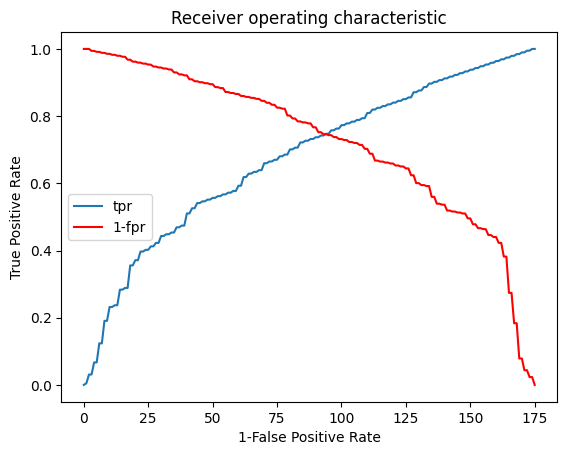

In [38]:
# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'], label='tpr')
plt.plot(roc['1-fpr'], color = 'red', label='1-fpr')
plt.legend(loc='best')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [42]:
def find_optimal_cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold']) 

In [43]:
# Find optimal probability threshold
# Note: probs[:, 1] will have probability of being positive label
threshold = find_optimal_cutoff(y_train, probs[:, 1])
print ("Optimal Probability Threshold: ", threshold)

# Applying the threshold to the prediction probability
y_pred_optimal = np.where(y_pred_prob >= threshold, 1, 0)

# Let's compare the accuracy of traditional/normal approach vs optimal cutoff
print ("\nNormal - Accuracy: ", metrics.accuracy_score(y_train, y_pred))
print ("Optimal Cutoff - Accuracy: ", metrics.accuracy_score(y_train, y_pred_optimal))
print ("\nNormal - Confusion Matrix: \n", metrics.confusion_matrix(y_train, y_pred))
print ("Optimal - Cutoff Confusion Matrix: \n", metrics.confusion_matrix(y_train, y_pred_optimal))

Optimal Probability Threshold:  [0.33959105199545264]

Normal - Accuracy:  0.7635009310986964
Optimal Cutoff - Accuracy:  0.7467411545623837

Normal - Confusion Matrix: 
 [[297  46]
 [ 81 113]]
Optimal - Cutoff Confusion Matrix: 
 [[256  87]
 [ 49 145]]
